In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('process_heart.csv')
X = df.drop('target', axis=1)
y = df['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=5)

# Check test set

In [2]:
X_test.shape

(205, 26)

In [3]:
X_test.head()

,age,resting_blood_pressure,cholestoral,maximum_heart_rate,ST_depression,major_vessels_num,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,...,resting_electrocardiographic_normal,exercise_induced_angina_no,exercise_induced_angina_yes,ST_slope_downsloping,ST_slope_flat,ST_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect,thalassemia_unknown
620,57,152,274,88,1.2,1,False,True,False,False,...,False,False,True,False,True,False,False,False,True,False
181,64,110,211,144,1.8,0,False,True,True,False,...,True,False,True,False,True,False,True,False,False,False
546,70,130,322,109,2.4,3,False,True,False,False,...,True,True,False,False,True,False,True,False,False,False
618,49,130,266,171,0.6,0,False,True,False,True,...,False,True,False,True,False,False,True,False,False,False
822,60,130,253,144,1.4,1,False,True,False,False,...,False,False,True,True,False,False,False,False,True,False


# Filter out an unknown sample

In [4]:
X_test.iloc[2]

age                                                             70
resting_blood_pressure                                         130
cholestoral                                                    322
maximum_heart_rate                                             109
ST_depression                                                  2.4
major_vessels_num                                                3
sex_female                                                   False
sex_male                                                      True
chest_pain_type_asymptomatic                                 False
chest_pain_type_atypical angina                              False
chest_pain_type_non-anginal pain                             False
chest_pain_type_typical angina                                True
fasting_blood_sugar_greater than 120mg/ml                    False
fasting_blood_sugar_lower than 120mg/ml                       True
resting_electrocardiographic_ST-T wave abnormality           F

In [6]:
test_sample = X_test.iloc[2]
test_sample.shape

(26,)

In [8]:
test_sample = np.array(test_sample).reshape(1,-1)
test_sample

array([[70, 130, 322, 109, 2.4, 3, False, True, False, False, False,
        True, False, True, False, False, True, True, False, False, True,
        False, True, False, False, False]], dtype=object)

In [9]:
test_sample.shape

(1, 26)

# Predicate the unknow sample filter out

In [12]:
#Two-class qualitative classification results
model.predict(test_sample)

array([0], dtype=int64)

In [13]:
#Two-class quantitative classification results
model.predict_proba(test_sample)

array([[0.82898303, 0.17101697]])

# Predict all data on the test set

In [14]:
model.predict(X_test)

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [15]:
model.predict_proba(X_test)

array([[0.98660366, 0.01339634],
       [0.3661894 , 0.6338106 ],
       [0.82898303, 0.17101697],
       [0.0713009 , 0.9286991 ],
       [0.94456693, 0.05543307],
       [0.05570868, 0.94429132],
       [0.81976441, 0.18023559],
       [0.05807763, 0.94192237],
       [0.78903465, 0.21096535],
       [0.49117695, 0.50882305],
       [0.81947456, 0.18052544],
       [0.05807763, 0.94192237],
       [0.87574699, 0.12425301],
       [0.68923856, 0.31076144],
       [0.16963395, 0.83036605],
       [0.97420693, 0.02579307],
       [0.08302262, 0.91697738],
       [0.0783156 , 0.9216844 ],
       [0.9387684 , 0.0612316 ],
       [0.07629617, 0.92370383],
       [0.49413607, 0.50586393],
       [0.33953592, 0.66046408],
       [0.05463877, 0.94536123],
       [0.91673656, 0.08326344],
       [0.12072365, 0.87927635],
       [0.17604156, 0.82395844],
       [0.44285843, 0.55714157],
       [0.17021319, 0.82978681],
       [0.98890017, 0.01109983],
       [0.04798789, 0.95201211],
       [0.

In [16]:
model.predict_proba(X_test)[:,1]

array([0.01339634, 0.6338106 , 0.17101697, 0.9286991 , 0.05543307,
       0.94429132, 0.18023559, 0.94192237, 0.21096535, 0.50882305,
       0.18052544, 0.94192237, 0.12425301, 0.31076144, 0.83036605,
       0.02579307, 0.91697738, 0.9216844 , 0.0612316 , 0.92370383,
       0.50586393, 0.66046408, 0.94536123, 0.08326344, 0.87927635,
       0.82395844, 0.55714157, 0.82978681, 0.01109983, 0.95201211,
       0.80556087, 0.82626135, 0.34898589, 0.36679207, 0.94429132,
       0.03254483, 0.20231048, 0.71130345, 0.85728865, 0.45797629,
       0.65509409, 0.02908664, 0.25557156, 0.93198346, 0.12796078,
       0.709123  , 0.96248108, 0.93125411, 0.48847797, 0.17550431,
       0.93610741, 0.19863805, 0.81153988, 0.1830286 , 0.77828351,
       0.67884784, 0.88660957, 0.25492146, 0.93412427, 0.91507902,
       0.96248108, 0.09580391, 0.93105909, 0.86875234, 0.50586393,
       0.41491026, 0.2437425 , 0.02950353, 0.33920085, 0.87631133,
       0.94192237, 0.63232138, 0.77132352, 0.0346562 , 0.61605

In [17]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [18]:
y_test

620     0
181     1
546     0
618     1
822     0
       ..
765     0
176     0
1024    0
444     1
408     1
Name: target, Length: 205, dtype: int64

# Confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix_model = confusion_matrix(y_test, y_pred)
confusion_matrix_model

array([[ 84,  13],
       [  7, 101]], dtype=int64)

In [21]:
import itertools
def cnf_matrix_plotter(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    threshold = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], 
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                fontsize=25)

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

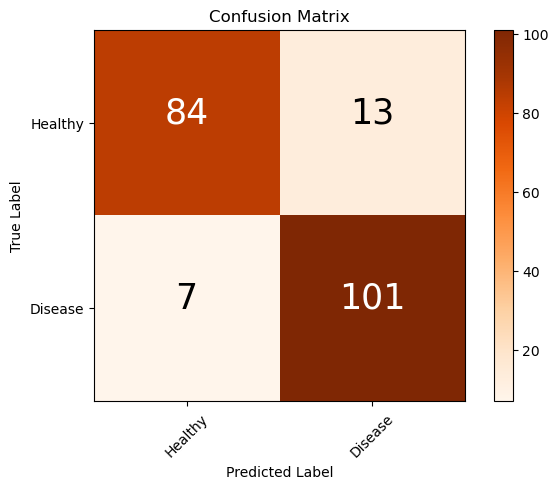

In [22]:
cnf_matrix_plotter(confusion_matrix_model, ['Healthy', 'Disease'])

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Healthy', 'Disease']))

              precision    recall  f1-score   support

     Healthy       0.92      0.87      0.89        97
     Disease       0.89      0.94      0.91       108

    accuracy                           0.90       205
   macro avg       0.90      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205



# ROC Curve

In [24]:
model.predict_proba(X_test)

array([[0.98660366, 0.01339634],
       [0.3661894 , 0.6338106 ],
       [0.82898303, 0.17101697],
       [0.0713009 , 0.9286991 ],
       [0.94456693, 0.05543307],
       [0.05570868, 0.94429132],
       [0.81976441, 0.18023559],
       [0.05807763, 0.94192237],
       [0.78903465, 0.21096535],
       [0.49117695, 0.50882305],
       [0.81947456, 0.18052544],
       [0.05807763, 0.94192237],
       [0.87574699, 0.12425301],
       [0.68923856, 0.31076144],
       [0.16963395, 0.83036605],
       [0.97420693, 0.02579307],
       [0.08302262, 0.91697738],
       [0.0783156 , 0.9216844 ],
       [0.9387684 , 0.0612316 ],
       [0.07629617, 0.92370383],
       [0.49413607, 0.50586393],
       [0.33953592, 0.66046408],
       [0.05463877, 0.94536123],
       [0.91673656, 0.08326344],
       [0.12072365, 0.87927635],
       [0.17604156, 0.82395844],
       [0.44285843, 0.55714157],
       [0.17021319, 0.82978681],
       [0.98890017, 0.01109983],
       [0.04798789, 0.95201211],
       [0.

In [25]:
model.predict_proba(X_test)[:,1]

array([0.01339634, 0.6338106 , 0.17101697, 0.9286991 , 0.05543307,
       0.94429132, 0.18023559, 0.94192237, 0.21096535, 0.50882305,
       0.18052544, 0.94192237, 0.12425301, 0.31076144, 0.83036605,
       0.02579307, 0.91697738, 0.9216844 , 0.0612316 , 0.92370383,
       0.50586393, 0.66046408, 0.94536123, 0.08326344, 0.87927635,
       0.82395844, 0.55714157, 0.82978681, 0.01109983, 0.95201211,
       0.80556087, 0.82626135, 0.34898589, 0.36679207, 0.94429132,
       0.03254483, 0.20231048, 0.71130345, 0.85728865, 0.45797629,
       0.65509409, 0.02908664, 0.25557156, 0.93198346, 0.12796078,
       0.709123  , 0.96248108, 0.93125411, 0.48847797, 0.17550431,
       0.93610741, 0.19863805, 0.81153988, 0.1830286 , 0.77828351,
       0.67884784, 0.88660957, 0.25492146, 0.93412427, 0.91507902,
       0.96248108, 0.09580391, 0.93105909, 0.86875234, 0.50586393,
       0.41491026, 0.2437425 , 0.02950353, 0.33920085, 0.87631133,
       0.94192237, 0.63232138, 0.77132352, 0.0346562 , 0.61605

In [28]:
y_pred_quant = model.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03092784, 0.03092784, 0.03092784, 0.03092784, 0.03092784,
       0.03092784, 0.03092784, 0.03092784, 0.04123711, 0.04123711,
       0.04123711, 0.04123711, 0.04123711, 0.04123711, 0.07216495,
       0.07216495, 0.07216495, 0.09278351, 0.09278351, 0.10309278,
       0.10309278, 0.10309278, 0.11340206, 0.13402062, 0.13402062,
       0.15463918, 0.15463918, 0.20618557, 0.32989691, 0.37113402,
       0.39175258, 0.39175258, 0.42268041, 0.42268041, 0.4742268 ,
       0.51546392, 0.55670103, 0.57731959, 0.6185567 , 0.64948454,
       0.71134021, 0.74226804, 0.75257732, 0.77319588, 0.86597938,
       0.92783505, 0.94845361, 0.96907216, 1.        ])

In [29]:
tpr

array([0.        , 0.00925926, 0.03703704, 0.05555556, 0.07407407,
       0.09259259, 0.10185185, 0.13888889, 0.14814815, 0.18518519,
       0.21296296, 0.25      , 0.28703704, 0.2962963 , 0.31481481,
       0.33333333, 0.37037037, 0.46296296, 0.48148148, 0.50925926,
       0.50925926, 0.51851852, 0.53703704, 0.56481481, 0.62037037,
       0.73148148, 0.75      , 0.76851852, 0.76851852, 0.77777778,
       0.7962963 , 0.82407407, 0.84259259, 0.85185185, 0.85185185,
       0.86111111, 0.87962963, 0.87962963, 0.88888889, 0.88888889,
       0.90740741, 0.93518519, 0.93518519, 0.93518519, 0.9537037 ,
       0.9537037 , 0.96296296, 0.96296296, 0.96296296, 0.96296296,
       0.96296296, 0.98148148, 0.98148148, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [30]:
thresholds

array([       inf, 0.98049823, 0.96884047, 0.96248108, 0.95416877,
       0.95201211, 0.94719468, 0.94429132, 0.94269747, 0.94192237,
       0.93846229, 0.93125411, 0.9286991 , 0.92405375, 0.92370383,
       0.91697738, 0.91507902, 0.87576881, 0.87037219, 0.85859061,
       0.85728865, 0.85623753, 0.84635525, 0.83036605, 0.82395844,
       0.77704137, 0.77132352, 0.76167616, 0.74920838, 0.73100247,
       0.71130345, 0.6674065 , 0.66046408, 0.65784036, 0.65509409,
       0.63996268, 0.6338106 , 0.61605975, 0.60963827, 0.60234449,
       0.56940936, 0.55714157, 0.50882305, 0.50586393, 0.48847797,
       0.47068731, 0.45797629, 0.35478462, 0.30619795, 0.2437425 ,
       0.22785219, 0.22587837, 0.20231048, 0.19863805, 0.18023559,
       0.17101697, 0.13762595, 0.13502882, 0.09802429, 0.09580391,
       0.05842949, 0.05543307, 0.04535259, 0.04379713, 0.01502944,
       0.01234376, 0.01154092, 0.01142732, 0.00551185])

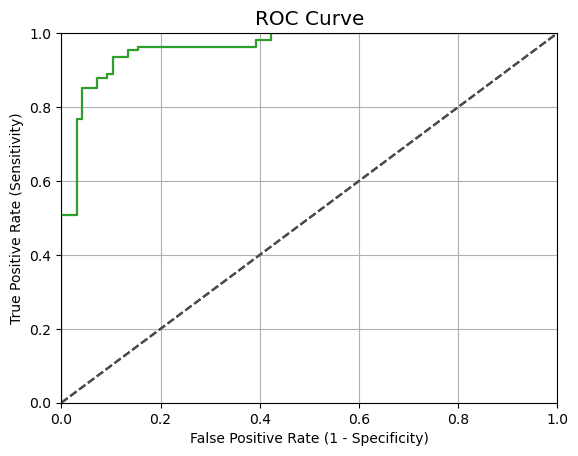

In [33]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [34]:
auc(fpr, tpr)

0.9619129438717068